## This notebook has 
1. Download Landsat9,8,7 Tier 1 and Tier 2 data
2. Plot the Time series
3. NDVI for the lake shape for a day is plotted as well

## [Landsat 9](https://landsat.gsfc.nasa.gov/satellites/landsat-9/) was successfully launched on Sept. 27, 2021. USGS has been providing Landsat data to the public since Feb. 10, 2022. Landsat 9 data can be downloaded from [EarthExplorer](https://earthexplorer.usgs.gov/). The Earth Engine team has been ingesting Landsat 9 into the Public Data Catalog. As of Feb. 14, 2022, although Landsat 9 data have not been publicly listed on the [Earth Engine Datasets](https://developers.google.com/earth-engine/datasets) page, you can access the data through ee.ImageCollection('LANDSAT/LC09/C02/T2_L2')

In [1]:
# import libraries, authenticate and initialize - 
#Python3.9(Anaconda 2022) on negishi has the libraries
import ee
import wxee as wx

In [2]:
import matplotlib.pyplot as plt


In [3]:
# Trigger the authentication flow.
ee.Authenticate()

Enter verification code: 4/1AcvDMrC-fpzYl_LBN5B2t6dS5yvZ2t954X9fyXZeEMGkS5_FrqreW6N_LAU

Successfully saved authorization token.


In [3]:
# Initialize Earth Engine
ee.Initialize()
wx.Initialize()


### Apply scaling factors. See https://developers.google.com/earth-engine/datasets/catalog/LANDSAT_LC08_C02_T2_L2#bands

In [4]:
#
def applyScaleFactors(image):
    opticalBands = image.select('SR_B.').multiply(0.0000275).add(-0.2)
    thermalBands = image.select('ST_B.*').multiply(0.00341802).add(149.0)
    return image.addBands(opticalBands, None, True).addBands(thermalBands, None, True)

### Specify a bounding box for the area of interest(aoi)

In [5]:
#Pacawong lake boundary box
aoi = ee.Geometry.Polygon(
    [[[-91.3625, 46.1597],
      [-91.3625, 46.1416],
      [-91.33, 46.1416],
      [-91.33, 46.1597]]]
)

In [6]:
# https://developers.google.com/earth-engine/datasets/catalog/LANDSAT_LC09_C02_T2_L2
# USGS Landsat 9 Level 2, Collection 2, Tier 2 
# Availability 2021-10-31T00:00:00Z to 2024-04-18T22:53:53Z

start_date = '2021-10-31'
end_date = '2024-04-18'
dataset = ee.ImageCollection('LANDSAT/LC09/C02/T2_L2').filterDate(start_date, end_date).filterBounds(aoi)
dataset = dataset.map(applyScaleFactors)
dataset = dataset.set('system:time_start', 0)
ds_landsat9 = dataset.wx.to_xarray(region=aoi.bounds(), scale=30)#,  crs='EPSG:32645')



Requesting data:   0%|          | 0/16 [00:00<?, ?it/s]

In [8]:
#Check the time steps,dimesions and attributes of the data downloaded
ds_landsat9

<xarray.Dataset>
Dimensions:        (time: 16, x: 122, y: 68)
Coordinates:
  * time           (time) datetime64[ns] 2021-11-01T16:51:38 ... 2024-04-08T1...
  * x              (x) float64 -91.36 -91.36 -91.36 ... -91.33 -91.33 -91.33
  * y              (y) float64 46.16 46.16 46.16 46.16 ... 46.14 46.14 46.14
    spatial_ref    int64 0
Data variables: (12/19)
    SR_B1          (time, y, x) float64 -0.03077 -0.03077 ... 0.8375 0.8327
    SR_B2          (time, y, x) float64 -0.00519 -0.00519 ... 0.847 0.8431
    SR_B3          (time, y, x) float64 0.05234 0.05234 ... 0.8532 0.8462
    SR_B4          (time, y, x) float64 0.05019 0.05019 0.0659 ... 0.8752 0.8652
    SR_B5          (time, y, x) float64 0.2474 0.2474 0.2438 ... 0.8942 0.8796
    SR_B6          (time, y, x) float64 0.193 0.193 0.2015 ... 0.5368 0.5442
    ...             ...
    ST_EMSD        (time, y, x) float64 79.0 79.0 79.0 79.0 ... 82.0 82.0 82.0
    ST_QA          (time, y, x) float64 670.0 670.0 670.0 ... 686.0 686.0 685.0
    ST_TRAD        (time, y, x) float64 5.222e+03 5.222e+03 ... 5.048e+03
    ST_URAD        (time, y, x) float64 424.0 424.0 ... 1.089e+03 1.088e+03
    QA_PIXEL       (time, y, x) float64 2.228e+04 2.228e+04 ... 2.228e+04
    QA_RADSAT      (time, y, x) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
Attributes:
    AREA_OR_POINT:           Area
    TIFFTAG_RESOLUTIONUNIT:  1 (unitless)
    TIFFTAG_XRESOLUTION:     1
    TIFFTAG_YRESOLUTION:     1
    _FillValue:              -32768.0
    scale_factor:            1.0
    add_offset:              0.0

## Specify the Formula for the index to use: NDVI

In [7]:
ds_ndvi9 = (ds_landsat9.SR_B5 - ds_landsat9.SR_B4) / (ds_landsat9.SR_B5 + ds_landsat9.SR_B4)

### Plot the Timeseries of all the timesteps and data available for the aoi

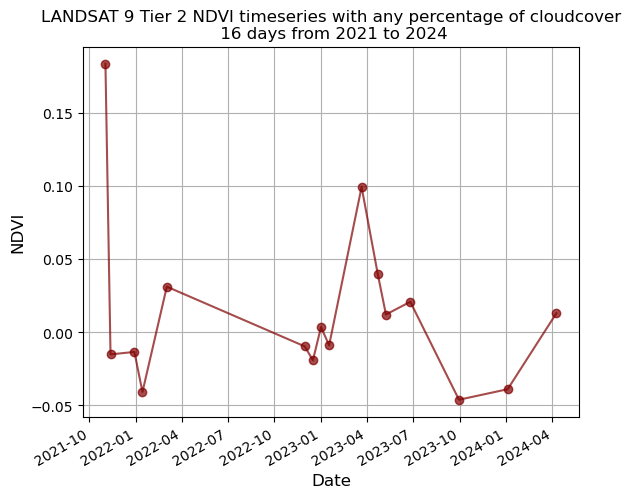

In [12]:
mean_ndvi = ds_ndvi9.mean(dim='x').mean(dim='y')
mean_ndvi.plot(alpha = 0.7,marker = 'o', color = 'maroon')

# plt.scatter(meand_ndvi, alpha=0.2)
plt.grid()
plt.xlabel('Date', fontsize=12)
plt.ylabel('NDVI', fontsize=12)
plt.title('LANDSAT 9 Tier 2 NDVI timeseries with any percentage of cloudcover\n 16 days from 2021 to 2024')
plt.show()


### Plot the Tier 1 landsat 9 Timeseries of all the timesteps and data available for the aoi

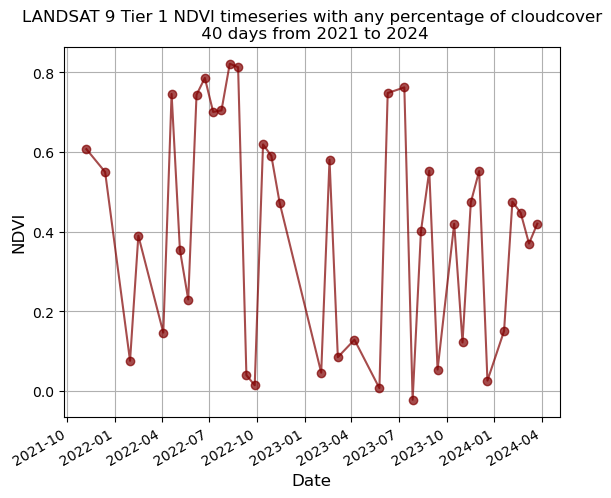

In [11]:
start_date = '2021-10-31'
end_date = '2024-04-18'
dataset = ee.ImageCollection('LANDSAT/LC09/C02/T1_L2').filterDate(start_date, end_date).filterBounds(aoi)
dataset = dataset.map(applyScaleFactors)
dataset = dataset.set('system:time_start', 0)
ds_landsat9_T1 = dataset.wx.to_xarray(region=aoi.bounds(), scale=30)#,  crs='EPSG:32645')
ds_ndvi9_T1 = (ds_landsat9_T1.SR_B5 - ds_landsat9_T1.SR_B4) / (ds_landsat9_T1.SR_B5 + ds_landsat9_T1.SR_B4)
mean_ndvi_T1 = ds_ndvi9_T1.mean(dim='x').mean(dim='y')
mean_ndvi_T1.plot(alpha = 0.7,marker = 'o', color = 'maroon')

# plt.scatter(meand_ndvi, alpha=0.2)
plt.grid()
plt.xlabel('Date', fontsize=12)
plt.ylabel('NDVI', fontsize=12)
plt.title('LANDSAT 9 Tier 1 NDVI timeseries with any percentage of cloudcover\n 40 days from 2021 to 2024')
plt.show()

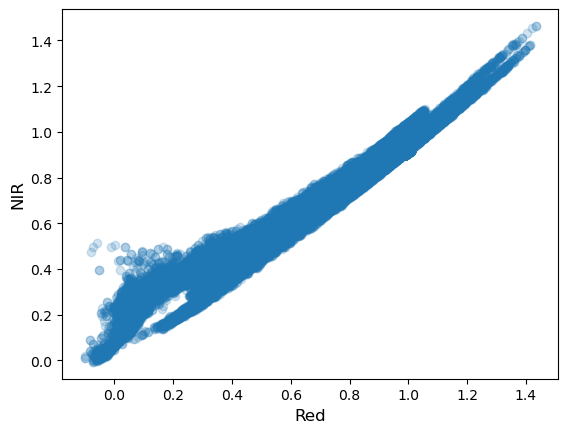

In [11]:
# Display a scatter plot of Red-NIR sample pairs using matplotlib.
plt.scatter(ds_landsat9.SR_B4, ds_landsat9.SR_B5, alpha=0.2)
plt.xlabel('Red', fontsize=12)
plt.ylabel('NIR', fontsize=12)
plt.show()

### LANDSAT 9 one day spatial NDVI for Tier 2 product

Text(0.5, 1.0, '2023-06-25T16:51:45.000000000')

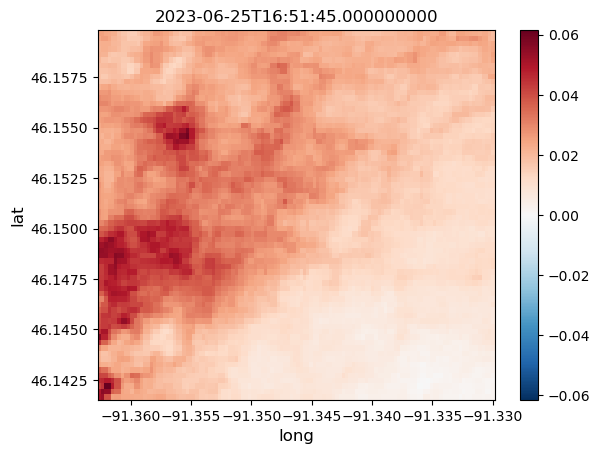

In [12]:
ds_ndvi9.sel(time='2023-06-25T16:51:45.000000000').plot()
#plt.grid()
plt.xlabel('long', fontsize=12)
plt.ylabel('lat', fontsize=12)
plt.title('2023-06-25T16:51:45.000000000')
#plt.show()

## Plot Timeseries
### Data Product: LANDSAT8 Tier 2
#### Time period: 2013 to 2024

Requesting data:   0%|          | 0/58 [00:00<?, ?it/s]

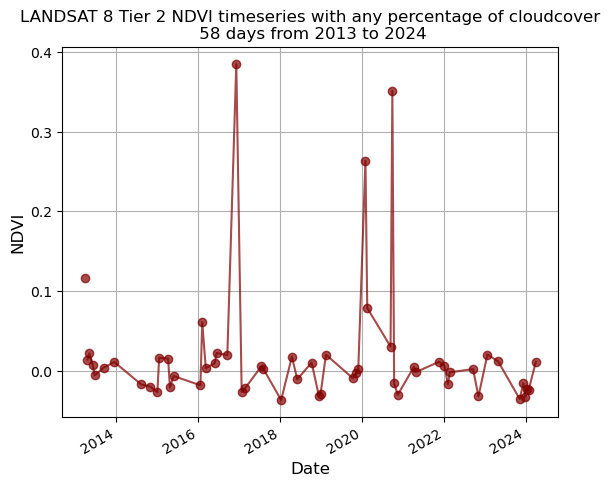

In [13]:
# https://developers.google.com/earth-engine/datasets/catalog/LANDSAT_LC09_C02_T2_L2
# USGS Landsat 8 Level 2, Collection 2, Tier 2 
# Availability 2013-03-18T15:58:38Z–2024-04-13T21:32:53Z

start_date = '2013-03-18'
end_date = '2024-04-13'
dataset = ee.ImageCollection("LANDSAT/LC08/C02/T2_L2").filterDate(start_date, end_date).filterBounds(aoi)
dataset = dataset.map(applyScaleFactors)
dataset = dataset.set('system:time_start', 0)
ds_landsat8_T2 = dataset.wx.to_xarray(region=aoi.bounds(), scale=30)#,  crs='EPSG:32645')

ds_ndvi8_T2 = (ds_landsat8_T2.SR_B5 - ds_landsat8_T2.SR_B4) / (ds_landsat8_T2.SR_B5 + ds_landsat8_T2.SR_B4)
mean_ndvi_T2 = ds_ndvi8_T2.mean(dim='x').mean(dim='y')
mean_ndvi_T2.plot(alpha = 0.7,marker = 'o', color = 'maroon')

# plt.scatter(meand_ndvi, alpha=0.2)
plt.grid()
plt.xlabel('Date', fontsize=12)
plt.ylabel('NDVI', fontsize=12)
plt.title('LANDSAT 8 Tier 2 NDVI timeseries with any percentage of cloudcover\n 58 days from 2013 to 2024')
plt.show()

### Data Product: LANDSAT8 Tier 1
#### Time period: 2013 to 2024

In [ ]:

start_date = '2013-03-18'
end_date = '2024-04-13'
dataset = ee.ImageCollection("LANDSAT/LC08/C02/T1_L2").filterDate(start_date, end_date).filterBounds(aoi)
dataset = dataset.map(applyScaleFactors)
dataset = dataset.set('system:time_start', 0)
ds_landsat8_T1 = dataset.wx.to_xarray(region=aoi.bounds(), scale=30)#,  crs='EPSG:32645')

ds_ndvi8_T1 = (ds_landsat8_T1.SR_B5 - ds_landsat8_T1.SR_B4) / (ds_landsat8_T1.SR_B5 + ds_landsat8_T1.SR_B4)
mean_ndvi_T1 = ds_ndvi8_T1.mean(dim='x').mean(dim='y')
mean_ndvi_T1.plot(alpha = 0.7,marker = 'o', color = 'maroon')

# plt.scatter(meand_ndvi, alpha=0.2)
plt.grid()
plt.xlabel('Date', fontsize=12)
plt.ylabel('NDVI', fontsize=12)
plt.title('LANDSAT 8 Tier 1 NDVI timeseries with any percentage of cloudcover\n 196 days from 2013 to 2024')
plt.show()

Requesting data:   0%|          | 0/196 [00:00<?, ?it/s]

In [7]:
# for landsat 7 prescribe the start and end date.
# catalog: https://developers.google.com/earth-engine/datasets/catalog/landsat-7
# Surface Reflectance
#Landsat 7 ETM+ Collection 2 atmospherically corrected surface reflectance.
#Dataset Availability-  1999-05-28T01:06:16Z to 2024-01-19T00:08:51Z
#Dataset Provider - USGS


#  no date october to April; May to September images fro various waterbody - northern minnesota, UP, wisconsin
# 
#start_date = '2000-01-01'
start_date = '2013-01-01'
end_date = '2024-01-19'
dataset = ee.ImageCollection('LANDSAT/LE07/C02/T2_L2').filterDate(start_date, end_date).filterBounds(aoi)
dataset = dataset.map(applyScaleFactors)
dataset = dataset.set('system:time_start', 0)
# 149 timesteps for 2000 to 2024.

In [8]:
ds_landsat_7_T2 = dataset.wx.to_xarray(region=aoi.bounds(), scale=30)#,  crs='EPSG:32645')

Requesting data:   0%|          | 0/74 [00:00<?, ?it/s]

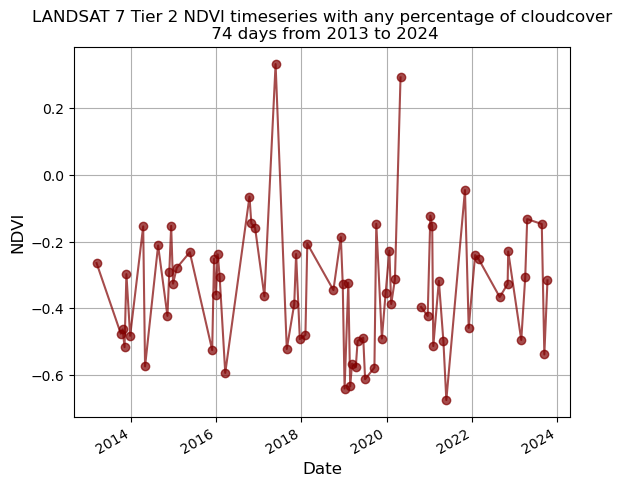

In [10]:
ds_ndvi_7_T2 = (ds_landsat_7_T2.SR_B5 - ds_landsat_7_T2.SR_B4) / (ds_landsat_7_T2.SR_B5 + ds_landsat_7_T2.SR_B4)
mean_ndvi_T2 = ds_ndvi_7_T2.mean(dim='x').mean(dim='y')
mean_ndvi_T2.plot(alpha = 0.7,marker = 'o', color = 'maroon')

# plt.scatter(meand_ndvi, alpha=0.2)
plt.grid()
plt.xlabel('Date', fontsize=12)
plt.ylabel('NDVI', fontsize=12)
plt.title('LANDSAT 7 Tier 2 NDVI timeseries with any percentage of cloudcover\n 74 days from 2013 to 2024')
plt.show()

In [ ]:
#start_date = '2000-01-01'
start_date = '2013-01-01'
end_date = '2024-01-19'
dataset = ee.ImageCollection('LANDSAT/LE07/C02/T1_L2').filterDate(start_date, end_date).filterBounds(aoi)
dataset = dataset.map(applyScaleFactors)
dataset = dataset.set('system:time_start', 0)
# 149 timesteps for 2000 to 2024.
ds_landsat_7_T1 = dataset.wx.to_xarray(region=aoi.bounds(), scale=30)#,  crs='EPSG:32645')
ds_ndvi_7_T1 = (ds_landsat_7_T1.SR_B5 - ds_landsat_7_T1.SR_B4) / (ds_landsat_7_T1.SR_B5 + ds_landsat_7_T1.SR_B4)
mean_ndvi_T1 = ds_ndvi_7_T1.mean(dim='x').mean(dim='y')
mean_ndvi_T1.plot(alpha = 0.7,marker = 'o', color = 'maroon')

# plt.scatter(meand_ndvi, alpha=0.2)
plt.grid()
plt.xlabel('Date', fontsize=12)
plt.ylabel('NDVI', fontsize=12)
plt.title('LANDSAT 7 Tier 1 NDVI timeseries with any percentage of cloudcover\n 221 days from 2013 to 2024')
plt.show()

Requesting data:   0%|          | 0/221 [00:00<?, ?it/s]

In [8]:
#Shapefile of Area of Influence

shp_clip = './Lake_Shp/Pacwawong.shp'
lake_path = '/depot/phig/data/Projects/Alka/Manoomin_landsat/Lake_shp/Pacwawong.shp'
import geopandas as gpd
from shapely.geometry import mapping
import rioxarray

lake = gpd.read_file(lake_path, crs = "epsg:4326")




AttributeError: 'QuadMesh' object has no attribute 'rio'

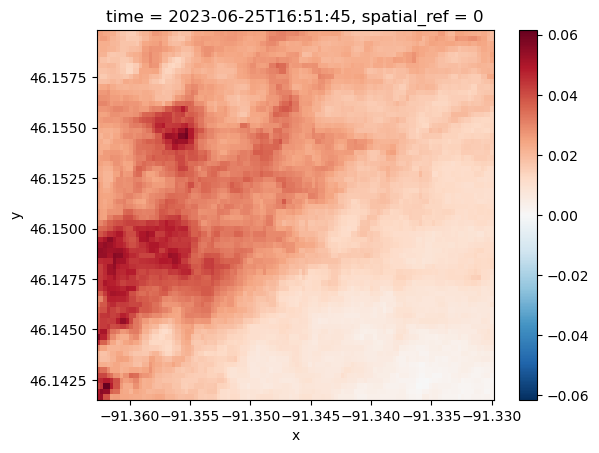

In [9]:
# the ndvi date to be plotted
data = ds_ndvi9.sel(time='2023-06-25T16:51:45.000000000').plot()

data.rio.clip(lake.geometry.apply(mapping), lake.crs, drop=True)
    # \



#ax=lake.plot(facecolor='none',edgecolor='black')
lake_ndvi=clipped.plot(ax=ax,zorder=-1)



data_nov.rio.set_spatial_dims(x_dim="x", y_dim="y", inplace=True)
data_nov.rio.write_crs("epsg:4326", inplace=True)
clipped_nov = data_nov.rio.clip(lake.geometry.apply(mapping), lake.crs, drop=True)
clipped_nov

NameError: name 'clipped' is not defined

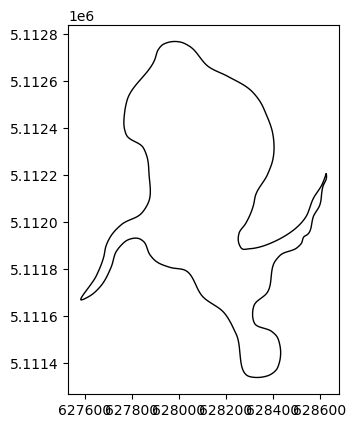

In [10]:
ax=lake.plot(facecolor='none',edgecolor='black')
lake_ndvi=clipped.plot(ax=ax,zorder=-1)
plt.xlabel('long', fontsize=12)
plt.ylabel('lat', fontsize=12)
plt.title('NDVI 2017-02-16T16:54:24.000000000')
#plt.show()

In [40]:
start_date = '2021-10-31'
end_date = '2024-04-18'



dataset_10cloud = ee.ImageCollection('LANDSAT/LC09/C02/T2_L2').filterDate(start_date, end_date)\
                        .filterBounds(aoi)\
                        .filter(ee.Filter.lt('CLOUD_COVER', 70))

dataset_10cloud = dataset_10cloud.map(applyScaleFactors)
dataset_10cloud = dataset_10cloud.set('system:time_start', 0)
ds_landsat9_10cloud = dataset_10cloud.wx.to_xarray(region=aoi.bounds(), scale=30)#,  crs='EPSG:32645')

Requesting data:   0%|          | 0/1 [00:00<?, ?it/s]

In [41]:
ds_landsat9_10cloud

<xarray.Dataset>
Dimensions:        (time: 1, x: 122, y: 68)
Coordinates:
  * time           (time) datetime64[ns] 2022-12-31T16:52:53
  * x              (x) float64 -91.36 -91.36 -91.36 ... -91.33 -91.33 -91.33
  * y              (y) float64 46.16 46.16 46.16 46.16 ... 46.14 46.14 46.14
    spatial_ref    int64 0
Data variables: (12/19)
    SR_B1          (time, y, x) float64 0.7614 0.7614 0.7173 ... 0.6764 0.6777
    SR_B2          (time, y, x) float64 0.7714 0.7714 0.7338 ... 0.6628 0.6669
    SR_B3          (time, y, x) float64 0.7227 0.7227 0.6508 ... 0.6127 0.6184
    SR_B4          (time, y, x) float64 0.7301 0.7301 0.6661 ... 0.6036 0.6096
    SR_B5          (time, y, x) float64 0.7391 0.7391 0.6857 ... 0.5964 0.6021
    SR_B6          (time, y, x) float64 0.4881 0.4881 0.4198 ... 0.3726 0.3742
    ...             ...
    ST_EMSD        (time, y, x) float64 79.0 79.0 79.0 79.0 ... 82.0 82.0 82.0
    ST_QA          (time, y, x) float64 715.0 715.0 715.0 ... 716.0 716.0 716.0
    ST_TRAD        (time, y, x) float64 4.295e+03 4.295e+03 ... 4.28e+03
    ST_URAD        (time, y, x) float64 504.0 504.0 504.0 ... 502.0 502.0 501.0
    QA_PIXEL       (time, y, x) float64 2.228e+04 2.228e+04 ... 2.228e+04
    QA_RADSAT      (time, y, x) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
Attributes:
    AREA_OR_POINT:           Area
    TIFFTAG_RESOLUTIONUNIT:  1 (unitless)
    TIFFTAG_XRESOLUTION:     1
    TIFFTAG_YRESOLUTION:     1
    _FillValue:              -32768.0
    scale_factor:            1.0
    add_offset:              0.0

## LANSAT 7

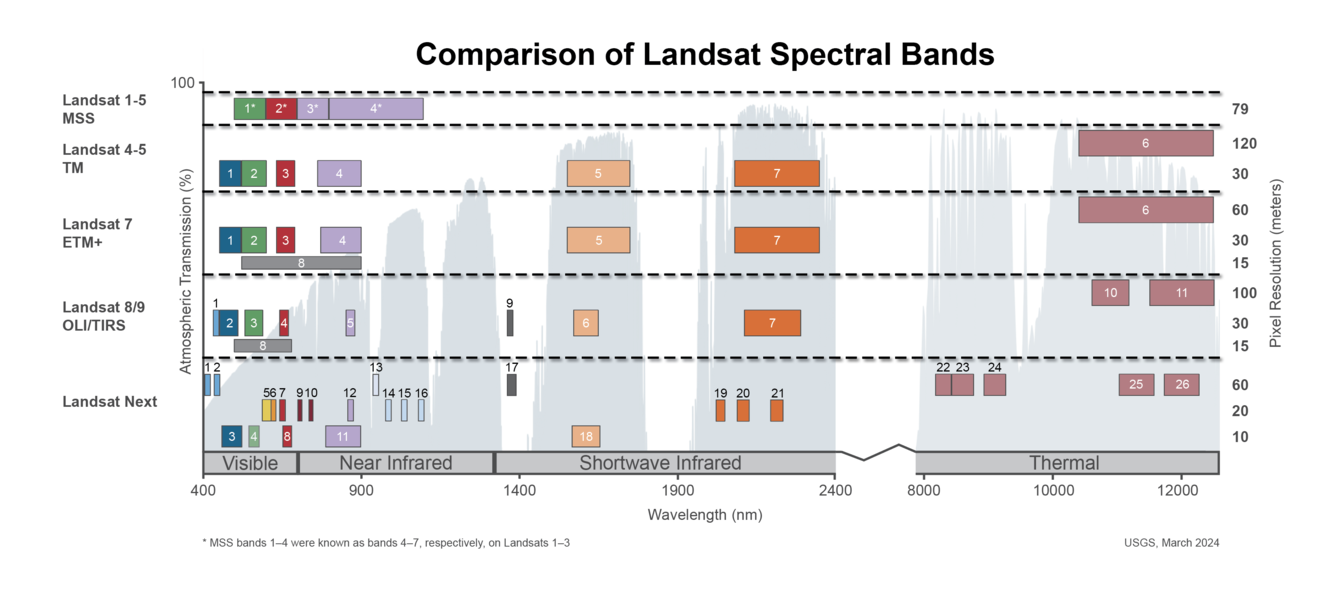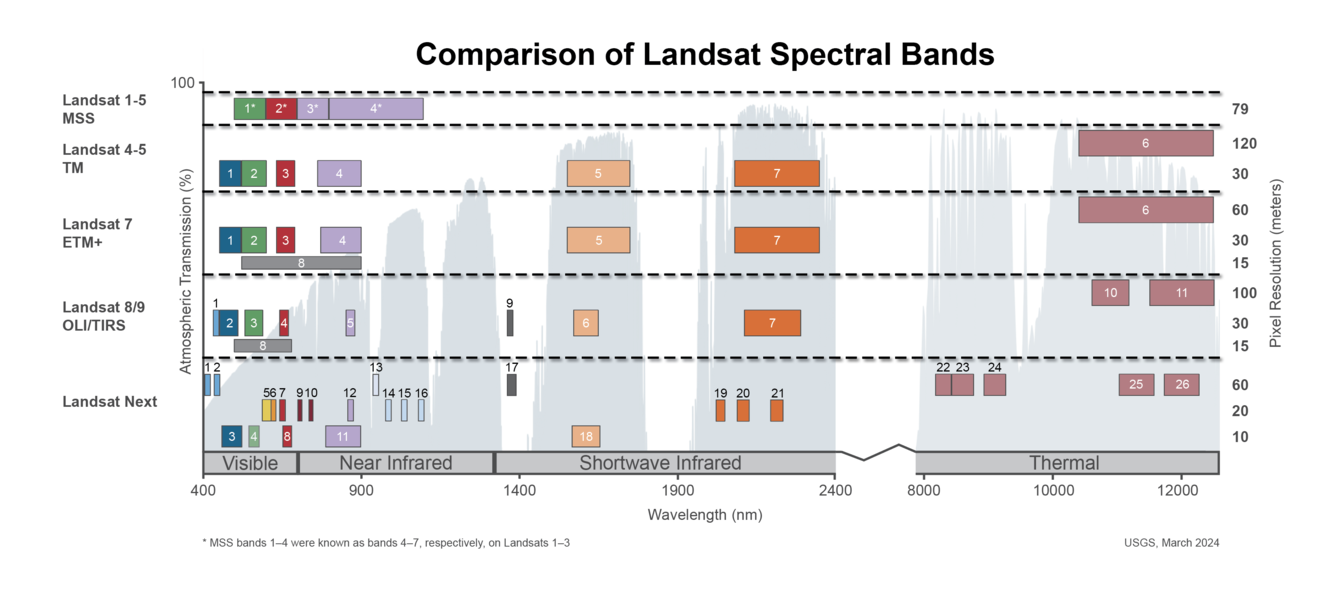

In [2]:
# for landsat 7 prescribe the start and end date.
# catalog: https://developers.google.com/earth-engine/datasets/catalog/landsat-7
# Surface Reflectance
#Landsat 7 ETM+ Collection 2 atmospherically corrected surface reflectance.
#Dataset Availability-  1999-05-28T01:06:16Z to 2024-01-19T00:08:51Z
#Dataset Provider - USGS


#  no date october to April; May to September images fro various waterbody - northern minnesota, UP, wisconsin
# 
start_date = '2000-01-01'
end_date = '2024-01-19'
dataset = ee.ImageCollection('LANDSAT/LE07/C02/T2_L2').filterDate(start_date, end_date).filterBounds(aoi)
dataset = dataset.map(applyScaleFactors)
dataset = dataset.set('system:time_start', 0)
ds_landsat = dataset.wx.to_xarray(region=aoi.bounds(), scale=30)#,  crs='EPSG:32645')

NameError: name 'ee' is not defined

In [1]:
ds_ndvi = (ds_landsat.SR_B5 - ds_landsat.SR_B4) / (ds_landsat.SR_B5 + ds_landsat.SR_B4)

NameError: name 'ds_landsat' is not defined

Text(0.5, 1.0, 'NDVI 2017-02-16T16:54:24.000000000')

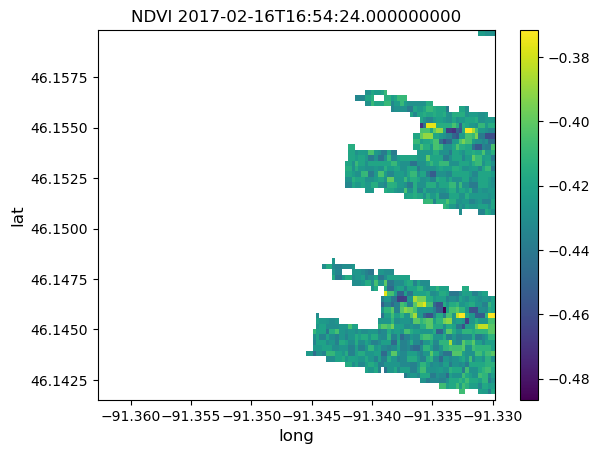

In [52]:
ds_ndvi.sel(time='2020-12-18T16:05:41.000000000').plot()
#plt.grid()
plt.xlabel('long', fontsize=12)
plt.ylabel('lat', fontsize=12)
plt.title('NDVI 2017-02-16T16:54:24.000000000')
#plt.show()

Text(0.5, 1.0, 'NDVI 2017-02-16T16:54:24.000000000')

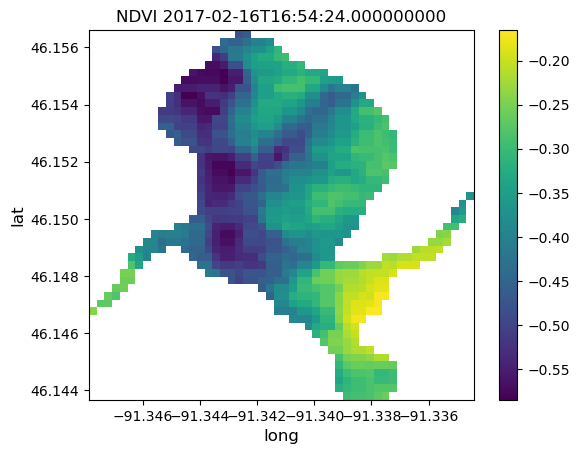

In [44]:
ax=lake.plot(facecolor='none',edgecolor='black')
lake_ndvi=clipped.plot(ax=ax,zorder=-1)
plt.xlabel('long', fontsize=12)
plt.ylabel('lat', fontsize=12)
plt.title('NDVI 2017-02-16T16:54:24.000000000')
#plt.show()

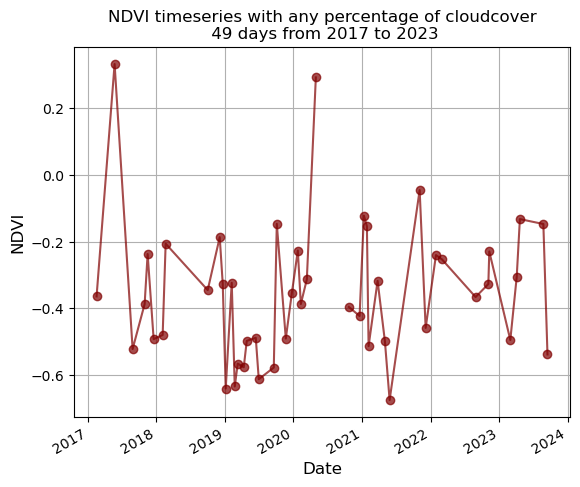

In [26]:
mean_ndvi = ds_ndvi.mean(dim='x').mean(dim='y')
mean_ndvi.plot(alpha = 0.7,marker = 'o', color = 'maroon')

# plt.scatter(meand_ndvi, alpha=0.2)
plt.grid()
plt.xlabel('Date', fontsize=12)
plt.ylabel('NDVI', fontsize=12)
plt.title('NDVI timeseries with any percentage of cloudcover\n 49 days from 2017 to 2023')
plt.show()

#mean_ndvi

In [49]:
mean_ndvi

<xarray.DataArray (time: 49)>
array([-0.36459132,  0.33248864, -0.52243499, -0.3876812 , -0.23748627,
       -0.49279174, -0.48034207, -0.20645353, -0.34566679, -0.18690284,
       -0.32636636, -0.64096917, -0.32382665, -0.6349036 , -0.56629327,
       -0.57704334, -0.49811938, -0.48869772, -0.61302047, -0.57801767,
       -0.14681343, -0.49105912, -0.35553852, -0.22705746, -0.38749645,
       -0.31369398,  0.29237005,         nan,         nan, -0.39633822,
       -0.42343385, -0.12232079, -0.1544328 , -0.51378058, -0.31807329,
       -0.49961089, -0.67556721, -0.04570235, -0.45921172, -0.2407666 ,
       -0.25362749, -0.36654379, -0.32749539, -0.22987916, -0.49534695,
       -0.30698394, -0.13268192, -0.14742754, -0.53879348])
Coordinates:
  * time         (time) datetime64[ns] 2017-02-16T16:54:24 ... 2023-09-15T14:...
    spatial_ref  int64 0

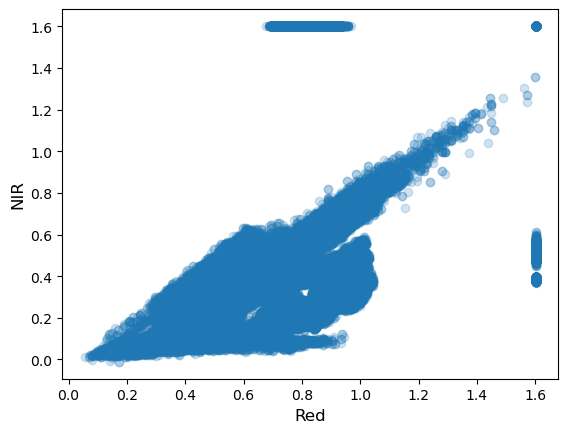

In [9]:

import matplotlib.pyplot as plt

# Display a scatter plot of Red-NIR sample pairs using matplotlib.
plt.scatter(ds_landsat.SR_B4, ds_landsat.SR_B5, alpha=0.2)
plt.xlabel('Red', fontsize=12)
plt.ylabel('NIR', fontsize=12)
plt.show()

In [47]:
start_date = '2017-01-01'
end_date = '2024-01-19'
#dataset_nocloud = ee.ImageCollection('LANDSAT/LE07/C02/T2_L2').filterDate(start_date, end_date).filterBounds(aoi).filter(ee.Filter.lt('SR_ATMOS_OPACITY', 0.1))

dataset_10cloud = ee.ImageCollection('LANDSAT/LE07/C02/T2_L2').filterDate(start_date, end_date)\
                        .filterBounds(aoi)\
                        .filter(ee.Filter.lt('CLOUD_COVER', 10))

dataset_10cloud = dataset_10cloud.map(applyScaleFactors)
dataset_10cloud = dataset_10cloud.set('system:time_start', 0)
ds_landsat_10cloud = dataset_10cloud.wx.to_xarray(region=aoi.bounds(), scale=30)#,  crs='EPSG:32645')

Requesting data:   0%|          | 0/3 [00:00<?, ?it/s]

In [48]:
ds_landsat_10cloud

<xarray.Dataset>
Dimensions:           (time: 3, x: 122, y: 68)
Coordinates:
  * time              (time) datetime64[ns] 2017-11-15T16:55:02 ... 2022-11-0...
  * x                 (x) float64 -91.36 -91.36 -91.36 ... -91.33 -91.33 -91.33
  * y                 (y) float64 46.16 46.16 46.16 46.16 ... 46.14 46.14 46.14
    spatial_ref       int64 0
Data variables: (12/19)
    SR_B1             (time, y, x) float64 0.7288 0.7288 ... 0.7789 0.7476
    SR_B2             (time, y, x) float64 0.7119 0.7119 ... 0.7222 0.6977
    SR_B3             (time, y, x) float64 0.724 0.724 0.724 ... 0.7793 0.7472
    SR_B4             (time, y, x) float64 0.71 0.71 0.6953 ... 0.8363 0.815
    SR_B5             (time, y, x) float64 0.4246 0.4246 ... 0.5766 0.5242
    SR_B7             (time, y, x) float64 0.2723 0.2723 ... 0.4665 0.4228
    ...                ...
    ST_EMSD           (time, y, x) float64 79.0 79.0 79.0 ... 82.0 82.0 82.0
    ST_QA             (time, y, x) float64 202.0 202.0 202.0 ... 659.0 663.0
    ST_TRAD           (time, y, x) float64 5.73e+03 5.73e+03 ... 5.916e+03
    ST_URAD           (time, y, x) float64 550.0 550.0 ... 2.633e+03 2.632e+03
    QA_PIXEL          (time, y, x) float64 1.36e+04 1.36e+04 ... 1.36e+04
    QA_RADSAT         (time, y, x) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
Attributes:
    AREA_OR_POINT:           Area
    TIFFTAG_RESOLUTIONUNIT:  1 (unitless)
    TIFFTAG_XRESOLUTION:     1
    TIFFTAG_YRESOLUTION:     1
    _FillValue:              -32768.0
    scale_factor:            1.0
    add_offset:              0.0

Text(0.5, 1.0, 'NDVI 2022-11-09T15:09:42.000000000;\n 10per cloud cover')

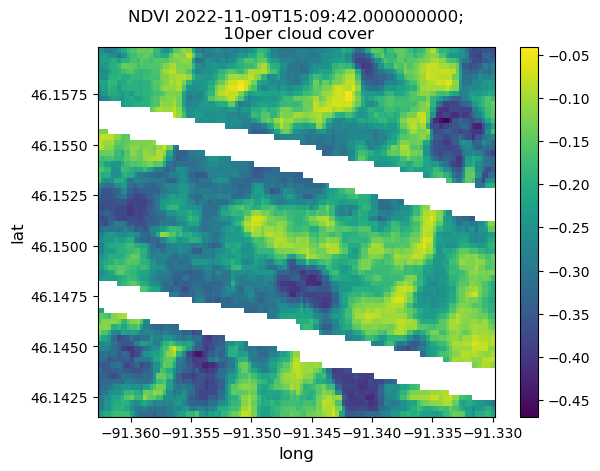

In [31]:
ds_ndvi_10cloud = (ds_landsat_10cloud.SR_B5 - ds_landsat_10cloud.SR_B4) / (ds_landsat_10cloud.SR_B5 + ds_landsat_10cloud.SR_B4)
ds_ndvi_10cloud.sel(time='2022-11-09T15:09:42.000000000').plot()

plt.xlabel('long', fontsize=12)
plt.ylabel('lat', fontsize=12)
plt.title('NDVI 2022-11-09T15:09:42.000000000;\n 10per cloud cover')

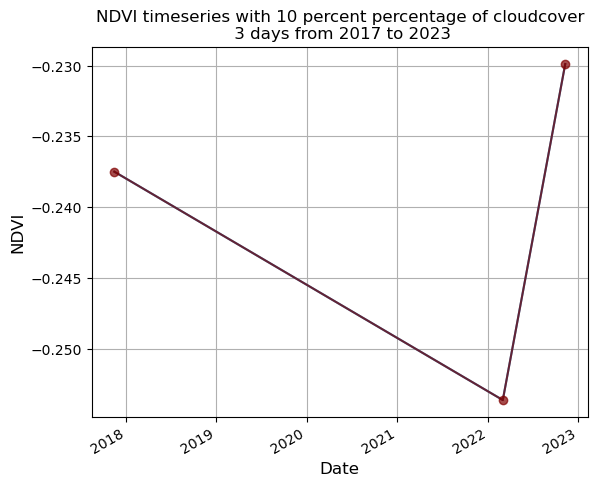

In [32]:
mean_ndvi_10cloud = ds_ndvi_10cloud.mean(dim='x').mean(dim='y')
mean_ndvi_10cloud.plot()

mean_ndvi_10cloud.plot(alpha = 0.7,marker = 'o', color = 'maroon')

# plt.scatter(meand_ndvi, alpha=0.2)
plt.grid()
plt.xlabel('Date', fontsize=12)
plt.ylabel('NDVI', fontsize=12)
plt.title('NDVI timeseries with 10 percent percentage of cloudcover\n 3 days from 2017 to 2023')
plt.show()


In [ ]:
ds_ndvi_10cloud.sel(time='2022-11-09T15:09:42.000000000').plot()



ax=lake.plot(facecolor='none',edgecolor='black')
lake_ndvi=clipped.plot(ax=ax,zorder=-1)
#plt.savefig('lake.png',dpi=300)


In [26]:
#Shapefile of Area of Influence

shp_clip = './Lake_Shp/Pacwawong.shp'
lake_path = '/depot/phig/data/Projects/Alka/Manoomin_landsat/Lake_shp/Pacwawong.shp'

In [27]:
#pip install geopandas
import geopandas as gpd
data.rio.clip(lake.geometry.apply(mapping), lake.crs, drop=True)

NameError: name 'data' is not defined

In [28]:
from shapely.geometry import mapping


In [29]:
lake = gpd.read_file(lake_path, crs = "epsg:4326")

In [30]:
import rioxarray

In [38]:
data = ds_ndvi.sel(time='2017-02-16T16:54:24.000000000')

In [39]:
data

<xarray.DataArray (y: 68, x: 122)>
array([[-0.60111492, -0.60111492, -0.65635371, ..., -0.39749072,
        -0.43169895, -0.43782086],
       [-0.51881702, -0.52475737, -0.52475737, ..., -0.37974663,
        -0.43169895, -0.4476447 ],
       [-0.47778719, -0.48922558, -0.48922558, ..., -0.32814146,
        -0.36252886, -0.40966991],
       ...,
       [-0.252102  , -0.24668227, -0.24121752, ..., -0.29977716,
        -0.29977716, -0.29896851],
       [-0.25185849, -0.23625035, -0.23618152, ..., -0.29977716,
        -0.29977716, -0.29421562],
       [-0.24618937, -0.21280865, -0.2130955 , ..., -0.29421562,
        -0.29421562, -0.29896851]])
Coordinates:
    time         datetime64[ns] 2017-02-16T16:54:24
  * x            (x) float64 -91.36 -91.36 -91.36 ... -91.33 -91.33 -91.33
  * y            (y) float64 46.16 46.16 46.16 46.16 ... 46.14 46.14 46.14 46.14
    spatial_ref  int64 0

In [40]:
data.rio.set_spatial_dims(x_dim="x", y_dim="y", inplace=True)
data.rio.write_crs("epsg:4326", inplace=True)


<xarray.DataArray (y: 68, x: 122)>
array([[-0.60111492, -0.60111492, -0.65635371, ..., -0.39749072,
        -0.43169895, -0.43782086],
       [-0.51881702, -0.52475737, -0.52475737, ..., -0.37974663,
        -0.43169895, -0.4476447 ],
       [-0.47778719, -0.48922558, -0.48922558, ..., -0.32814146,
        -0.36252886, -0.40966991],
       ...,
       [-0.252102  , -0.24668227, -0.24121752, ..., -0.29977716,
        -0.29977716, -0.29896851],
       [-0.25185849, -0.23625035, -0.23618152, ..., -0.29977716,
        -0.29977716, -0.29421562],
       [-0.24618937, -0.21280865, -0.2130955 , ..., -0.29421562,
        -0.29421562, -0.29896851]])
Coordinates:
    time         datetime64[ns] 2017-02-16T16:54:24
  * x            (x) float64 -91.36 -91.36 -91.36 ... -91.33 -91.33 -91.33
  * y            (y) float64 46.16 46.16 46.16 46.16 ... 46.14 46.14 46.14 46.14
    spatial_ref  int64 0

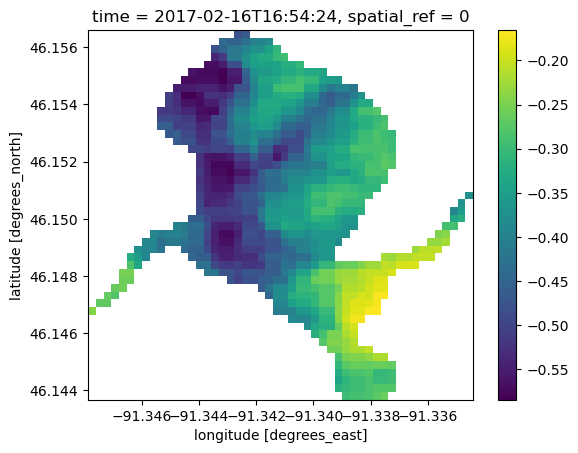

In [42]:
import matplotlib.pyplot as plt
ax=lake.plot(facecolor='none',edgecolor='black')
lake_ndvi=clipped.plot(ax=ax,zorder=-1)
#plt.savefig('lake.png',dpi=300)


In [56]:
ds_ndvi

<xarray.DataArray (time: 49, y: 68, x: 122)>
array([[[-0.60111492, -0.60111492, -0.65635371, ..., -0.39749072,
         -0.43169895, -0.43782086],
        [-0.51881702, -0.52475737, -0.52475737, ..., -0.37974663,
         -0.43169895, -0.4476447 ],
        [-0.47778719, -0.48922558, -0.48922558, ..., -0.32814146,
         -0.36252886, -0.40966991],
        ...,
        [-0.252102  , -0.24668227, -0.24121752, ..., -0.29977716,
         -0.29977716, -0.29896851],
        [-0.25185849, -0.23625035, -0.23618152, ..., -0.29977716,
         -0.29977716, -0.29421562],
        [-0.24618937, -0.21280865, -0.2130955 , ..., -0.29421562,
         -0.29421562, -0.29896851]],

       [[ 0.35379458,  0.35379458,  0.35379458, ...,  0.3706747 ,
          0.36643135,  0.36431952],
        [ 0.34965494,  0.34965494,  0.34965494, ...,  0.36854974,
          0.36643135,  0.36643135],
        [ 0.34554055,  0.34554055,  0.34554055, ...,  0.36643135,
          0.36430354,  0.36643135],
...
        [        nan,         nan,         nan, ..., -0.14120966,
         -0.14120966, -0.14025675],
        [        nan,         nan,         nan, ..., -0.14433786,
         -0.14433786, -0.13632106],
        [-0.2042452 , -0.23314027, -0.21744752, ..., -0.12612919,
         -0.12612919, -0.13128595]],

       [[-0.55772383, -0.55772383, -0.54915815, ..., -0.47832266,
         -0.47832266, -0.47346583],
        [-0.56093228, -0.55502292, -0.55502292, ..., -0.47622733,
         -0.46866962, -0.48105746],
        [-0.55503295, -0.56686097, -0.56686097, ..., -0.46664098,
         -0.45908497, -0.47621708],
        ...,
        [-0.54039751, -0.54882535, -0.55459743, ..., -0.56753293,
         -0.56753293, -0.55887775],
        [-0.56623662, -0.55775399, -0.54039751, ..., -0.56753293,
         -0.56753293, -0.56753293],
        [-0.56623662, -0.55775399, -0.55191365, ..., -0.56501088,
         -0.56501088, -0.56187732]]])
Coordinates:
  * time         (time) datetime64[ns] 2017-02-16T16:54:24 ... 2023-09-15T14:...
  * x            (x) float64 -91.36 -91.36 -91.36 ... -91.33 -91.33 -91.33
  * y            (y) float64 46.16 46.16 46.16 46.16 ... 46.14 46.14 46.14 46.14
    spatial_ref  int64 0

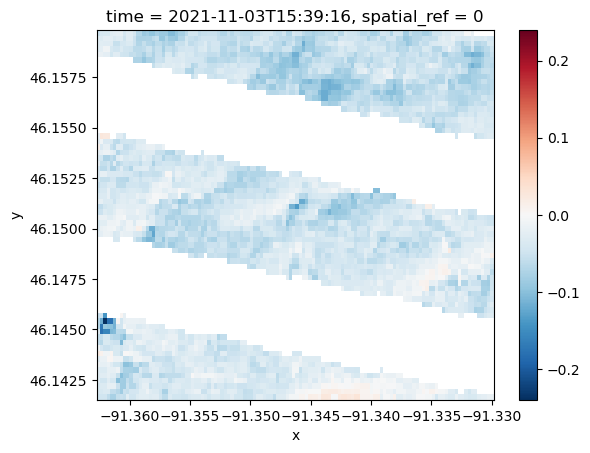

In [57]:
ds_ndvi.sel(time='2021-11-03T15:39:16.000000000').plot()

In [58]:
data_nov = ds_ndvi.sel(time='2021-11-03T15:39:16.000000000')

In [59]:
data_nov.rio.set_spatial_dims(x_dim="x", y_dim="y", inplace=True)
data_nov.rio.write_crs("epsg:4326", inplace=True)
clipped_nov = data_nov.rio.clip(lake.geometry.apply(mapping), lake.crs, drop=True)
clipped_nov

<xarray.DataArray (y: 48, x: 50)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * y            (y) float64 46.16 46.16 46.16 46.16 ... 46.14 46.14 46.14 46.14
  * x            (x) float64 -91.35 -91.35 -91.35 ... -91.34 -91.33 -91.33
    time         datetime64[ns] 2021-11-03T15:39:16
    spatial_ref  int64 0

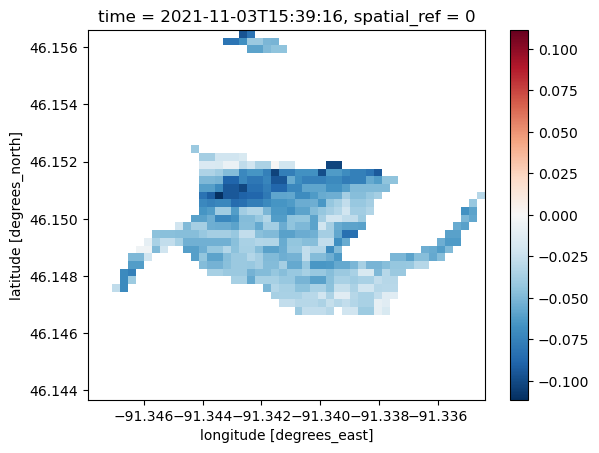

In [64]:
#import matplotlib.pyplot as plt
lake_ndvi_nov=clipped_nov.plot(ax=ax,zorder=-1)
#plt.savefig('lake.png',dpi=300)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
ax=lake.plot(facecolor='none',edgecolor='black')
lake_ndvi=clipped.plot(ax=ax,zorder=-1)
#plt.savefig('lake.png',dpi=300)
